In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("/content/drive/MyDrive/NLP/train.csv")
df_test = pd.read_csv("/content/drive/MyDrive/NLP/test.csv")

In [3]:
# from jupyterthemes import jtplot
# jtplot.style(theme='monokai',context='notebook',ticks=True,grid=False)

In [4]:
df.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


In [6]:
#Dropping id column from dataset

df = df.drop('id',axis=1)
df.head()

,label,tweet
0,0,@user when a father is dysfunctional and is s...
1,0,@user @user thanks for #lyft credit i can't us...
2,0,bihday your majesty
3,0,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation


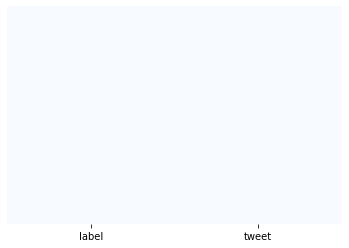

In [7]:
#Since there is no missing data in both columns there is no line grow through plot for any column for missing value.
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='Blues')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f69a66298d0>]],
      dtype=object)

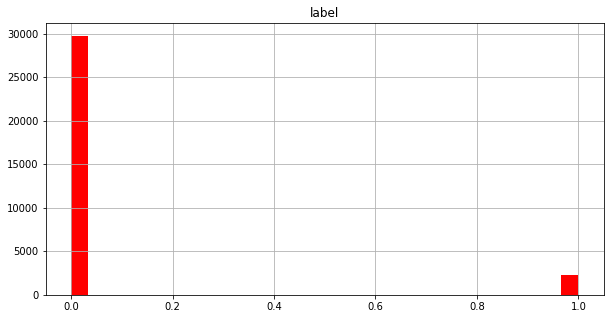

In [8]:
df.hist(bins=30,figsize=(10,5),color='r')

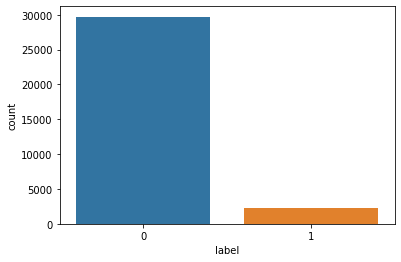

In [9]:
sns.countplot(df['label'])

In [10]:
df['length'] = df['tweet'].apply(len)

In [11]:
df.head()

,label,tweet,length
0,0,@user when a father is dysfunctional and is s...,102
1,0,@user @user thanks for #lyft credit i can't us...,122
2,0,bihday your majesty,21
3,0,#model i love u take with u all the time in ...,86
4,0,factsguide: society now #motivation,39


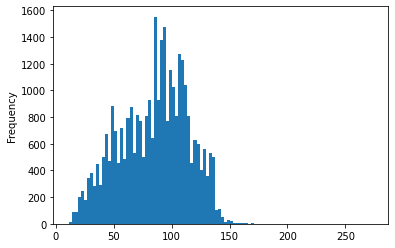

In [12]:
df['length'].plot(bins=100,kind='hist')

In [13]:
df['length'].describe()

count    31962.000000
mean        84.739628
std         29.455749
min         11.000000
25%         63.000000
50%         88.000000
75%        108.000000
max        274.000000
Name: length, dtype: float64

In [14]:
df['length'].min()

11

In [15]:
df[df['length'] == 11 ]

,label,tweet,length
25195,0,i love you,11


In [16]:
df['length'].max()

274

In [17]:
df[df['length'] == 274 ]

,label,tweet,length
19770,0,@user lmfao pathetic #soit #growup #funny #...,274


In [18]:
#Data Cleaning an Removing punctuations
import string
string.punctuation 

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [19]:
for char in range(len(df['tweet'])):
    char_list = [chars for chars in df['tweet'][char] if chars not in string.punctuation]
    df['tweet'][char] = ''.join(char_list)

In [20]:
##separting the positive and negative tweets.

positive = df[df['label'] == 0]

positive

,label,tweet,length
0,0,user when a father is dysfunctional and is so...,102
1,0,user user thanks for lyft credit i cant use ca...,122
2,0,bihday your majesty,21
3,0,model i love u take with u all the time in u...,86
4,0,factsguide society now motivation,39
...,...,...,...
31956,0,off fishing tomorrow user carnt wait first tim...,61
31957,0,ate user isz that youuuðððððð...,68
31958,0,to see nina turner on the airwaves trying to...,131
31959,0,listening to sad songs on a monday morning otw...,63


In [21]:
negative = df[df['label'] == 1]

negative

,label,tweet,length
13,1,user cnn calls michigan middle school build th...,74
14,1,no comment in australia opkillingbay seashe...,101
17,1,retweet if you agree,22
23,1,user user lumpy says i am a prove it lumpy,47
34,1,its unbelievable that in the 21st century wed ...,104
...,...,...,...
31934,1,lady banned from kentucky mall user jcpenny k...,59
31946,1,user omfg im offended im a mailbox and im pro...,82
31947,1,user user you dont have the balls to hashtag m...,112
31948,1,makes you ask yourself who am i then am i any...,87


In [22]:
positive_sentences = positive['tweet'].tolist()
negative_sentences = negative['tweet'].tolist()

In [23]:
positive_sentences[:10]

[' user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction   run',
 'user user thanks for lyft credit i cant use cause they dont offer wheelchair vans in pdx    disapointed getthanked',
 '  bihday your majesty',
 'model   i love u take with u all the time in urð\x9f\x93± ð\x9f\x98\x99ð\x9f\x98\x8eð\x9f\x91\x84ð\x9f\x91\x85ð\x9f\x92¦ð\x9f\x92¦ð\x9f\x92¦  ',
 ' factsguide society now    motivation',
 '22 huge fan fare and big talking before they leave chaos and pay disputes when they get there allshowandnogo  ',
 ' user camping tomorrow user user user user user user user dannyâ\x80¦',
 'the next school year is the year for examsð\x9f\x98¯ cant think about that ð\x9f\x98\xad school exams   hate imagine actorslife revolutionschool girl',
 'we won love the land allin cavs champions cleveland clevelandcavaliers  â\x80¦ ',
 ' user user welcome here   im   its so gr8  ']

In [24]:
len(positive_sentences)

29720

In [25]:
negative_sentences[:10]

['user cnn calls michigan middle school build the wall chant  tcot  ',
 'no comment  in australia   opkillingbay seashepherd helpcovedolphins thecove  helpcovedolphins',
 'retweet if you agree ',
 'user user lumpy says i am a  prove it lumpy',
 'its unbelievable that in the 21st century wed need something like this again neverump  xenophobia ',
 'user lets fight against  love peace ',
 'ð\x9f\x98©the white establishment cant have blk folx running around loving themselves and promoting our greatness  ',
 'user hey white people you can call people white by user  race  identity medâ\x80¦',
 'how the altright uses  amp insecurity to lure men into whitesupremacy    ',
 'user im not interested in a linguistics that doesnt address race amp  racism is about power raciolinguistics bringsâ\x80¦']

In [26]:
len(negative_sentences)

2242

In [27]:
positive_sentences_joined = " ".join(positive_sentences)
negative_sentences_joined = " ".join(negative_sentences)

In [28]:
##Plotting wordcouds for both categories of words
from wordcloud import WordCloud

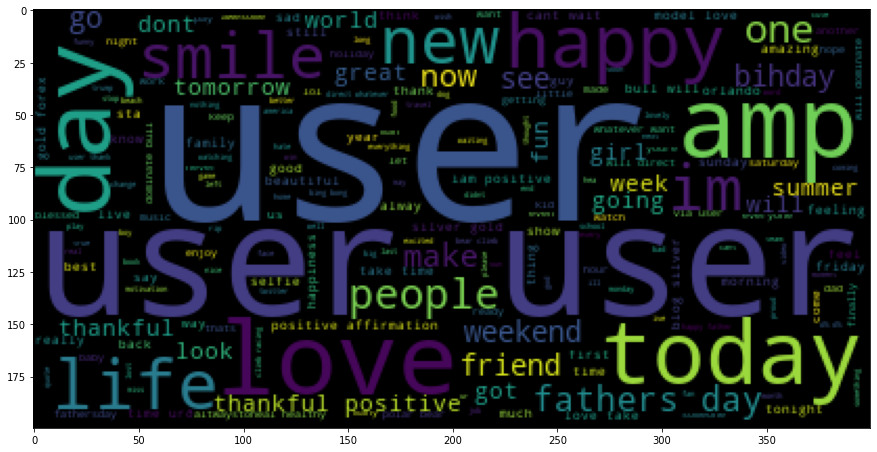

In [29]:
plt.figure(figsize=(15,15))
plt.imshow(WordCloud().generate(positive_sentences_joined))

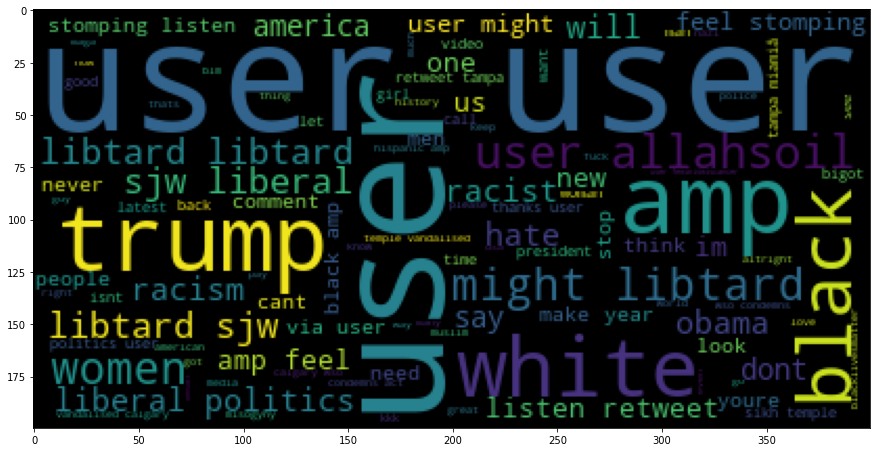

In [30]:
plt.figure(figsize=(15,15))
plt.imshow(WordCloud().generate(negative_sentences_joined))

In [31]:
#removing stopwords from the tweets
import nltk

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [32]:
from nltk.corpus import stopwords
#stopwords.words('english')

In [33]:
df['tweet']

0         user when a father is dysfunctional and is so...
1        user user thanks for lyft credit i cant use ca...
2                                      bihday your majesty
3        model   i love u take with u all the time in u...
4                     factsguide society now    motivation
                               ...                        
31957    ate user isz that youuuðððððð...
31958      to see nina turner on the airwaves trying to...
31959    listening to sad songs on a monday morning otw...
31960    user sikh temple vandalised in in calgary wso ...
31961                      thank you user for you follow  
Name: tweet, Length: 31962, dtype: object

In [34]:
for itweet in range(len(df['tweet'])):
    itweet_list = [word for word in df['tweet'][itweet].split() if word not in stopwords.words('english')]
    df['tweet'][itweet] = ' '.join(itweet_list)
      

In [35]:
df['tweet']

0        user father dysfunctional selfish drags kids d...
1        user user thanks lyft credit cant use cause do...
2                                           bihday majesty
3        model love u take u time urð± ðððð...
4                            factsguide society motivation
                               ...                        
31957    ate user isz youuuððððððð...
31958    see nina turner airwaves trying wrap mantle ge...
31959      listening sad songs monday morning otw work sad
31960    user sikh temple vandalised calgary wso condem...
31961                                    thank user follow
Name: tweet, Length: 31962, dtype: object

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [37]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Flatten, SimpleRNN,LSTM,GRU 

In [38]:
X = df['tweet']
y = df['label']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)


In [39]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

In [40]:
vocabulary = tokenizer.index_word
vocabulary

{1: 'user',
 2: 'love',
 3: 'day',
 4: 'happy',
 5: 'amp',
 6: 'time',
 7: 'im',
 8: 'u',
 9: 'life',
 10: 'like',
 11: 'today',
 12: 'â\x80¦',
 13: 'new',
 14: 'thankful',
 15: 'positive',
 16: 'get',
 17: 'people',
 18: 'bihday',
 19: 'good',
 20: 'cant',
 21: 'one',
 22: 'see',
 23: 'dont',
 24: 'smile',
 25: 'fathers',
 26: 'want',
 27: 'go',
 28: 'take',
 29: 'healthy',
 30: 'work',
 31: 'weekend',
 32: 'fun',
 33: 'bull',
 34: 'make',
 35: 'got',
 36: 'summer',
 37: 'way',
 38: 'friday',
 39: 'best',
 40: 'need',
 41: '2',
 42: 'us',
 43: 'family',
 44: 'days',
 45: 'beautiful',
 46: 'great',
 47: 'really',
 48: 'first',
 49: 'music',
 50: 'going',
 51: 'friends',
 52: 'morning',
 53: 'wait',
 54: 'fathersday',
 55: 'tomorrow',
 56: 'back',
 57: 'world',
 58: 'know',
 59: 'cute',
 60: 'week',
 61: 'sad',
 62: 'never',
 63: 'think',
 64: 'orlando',
 65: 'happiness',
 66: 'feel',
 67: 'blog',
 68: 'model',
 69: 'sunday',
 70: 'much',
 71: 'trump',
 72: 'night',
 73: 'home',
 74: 'r

In [41]:
vocab_len = len(vocabulary)
vocab_len

40871

In [42]:
train_sequence = tokenizer.texts_to_sequences(X_train)

In [43]:
doc_len = []
for doc in train_sequence:
    doc_len.append(len(doc))

In [44]:
max(doc_len)

26

In [45]:
max_len =np.quantile(doc_len, 0.99)

In [46]:
max_len =int(max_len)

In [47]:
train_sequence_mat = sequence.pad_sequences(train_sequence, maxlen= max_len)

In [48]:
train_sequence_mat

array([[    0,     0,     0, ...,  6614,   166, 13780],
       [    0,     0,     0, ...,   320,   928,  1698],
       [    0,     0,     0, ...,  4565,   637,   637],
       ...,
       [    0,     0,     0, ..., 40869,  8811, 40870],
       [    0,     0,     0, ...,  2383,   138,  7864],
       [    0,     0,     0, ...,   181,   130,    26]], dtype=int32)

In [49]:
test_sequence = tokenizer.texts_to_sequences(X_test)
test_sequence_matrix = sequence.pad_sequences(test_sequence, maxlen= max_len)

In [50]:
# model

model = Sequential()
model.add(Embedding(input_dim=vocab_len+1,output_dim=100,input_length=max_len,mask_zero=True))
model.add(Flatten())
model.add(Dense(64,activation="tanh"))
model.add(Dense(64,activation="tanh"))
model.add(Dense(1,activation="sigmoid"))

In [51]:
model.compile(optimizer="adam", loss="binary_crossentropy")

In [52]:
model.fit(train_sequence_mat,y_train, batch_size=32,epochs=10)

Epoch 1/10
800/800 [==============================] - 31s 38ms/step - loss: 0.1529
Epoch 2/10
800/800 [==============================] - 30s 37ms/step - loss: 0.0185
Epoch 3/10
800/800 [==============================] - 30s 37ms/step - loss: 0.0034
Epoch 4/10
800/800 [==============================] - 30s 38ms/step - loss: 0.0017
Epoch 5/10
800/800 [==============================] - 31s 38ms/step - loss: 0.0014
Epoch 6/10
800/800 [==============================] - 30s 38ms/step - loss: 7.8173e-04
Epoch 7/10
800/800 [==============================] - 30s 38ms/step - loss: 9.2682e-04
Epoch 8/10
800/800 [==============================] - 30s 37ms/step - loss: 8.7120e-04
Epoch 9/10
800/800 [==============================] - 30s 37ms/step - loss: 0.0012
Epoch 10/10
800/800 [==============================] - 30s 37ms/step - loss: 0.0013


In [53]:
y_pred = model.predict(test_sequence_matrix)

In [54]:
y_pred = np.where(y_pred >= 0.5, 1, 0)

In [55]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.98      0.97      0.97      6009
           1       0.58      0.65      0.61       384

    accuracy                           0.95      6393
   macro avg       0.78      0.81      0.79      6393
weighted avg       0.95      0.95      0.95      6393



In [56]:
# RNN
model = Sequential()
model.add(Embedding(input_dim=vocab_len+1,output_dim=100,input_length=max_len,mask_zero=True))
model.add(SimpleRNN(32, activation="tanh"))
model.add(Dense(32,activation="tanh"))
model.add(Dense(32,activation="tanh"))
model.add(Dense(1,activation="sigmoid"))

In [57]:
model.compile(optimizer="adam", loss="binary_crossentropy")

In [58]:
model.fit(train_sequence_mat,y_train, batch_size=32,epochs=10)

Epoch 1/10
800/800 [==============================] - 34s 41ms/step - loss: 0.1615
Epoch 2/10
800/800 [==============================] - 33s 41ms/step - loss: 0.0225
Epoch 3/10
800/800 [==============================] - 33s 41ms/step - loss: 0.0036
Epoch 4/10
800/800 [==============================] - 33s 42ms/step - loss: 0.0021
Epoch 5/10
800/800 [==============================] - 33s 41ms/step - loss: 0.0012
Epoch 6/10
800/800 [==============================] - 33s 41ms/step - loss: 0.0018
Epoch 7/10
800/800 [==============================] - 33s 41ms/step - loss: 0.0023
Epoch 8/10
800/800 [==============================] - 33s 41ms/step - loss: 0.0020
Epoch 9/10
800/800 [==============================] - 33s 41ms/step - loss: 0.0012
Epoch 10/10
800/800 [==============================] - 33s 41ms/step - loss: 0.0010


In [59]:
y_pred2 = model.predict(test_sequence_matrix)
y_pred2 = np.where(y_pred >= 0.5, 1, 0)

In [60]:
print(classification_report(y_pred2,y_test))

              precision    recall  f1-score   support

           0       0.98      0.97      0.97      6009
           1       0.58      0.65      0.61       384

    accuracy                           0.95      6393
   macro avg       0.78      0.81      0.79      6393
weighted avg       0.95      0.95      0.95      6393



In [61]:
##Fitting Test Data(without label column) to Neural Network.

In [62]:
df_test1 = df_test.drop('id',axis=1)

In [63]:
dropword_list = [word for word in stopwords.words('english')]
dropword_list += string.punctuation

In [64]:
for i in range(len(df_test['tweet'])):
  list1 = [word for word in df_test['tweet'][i].split() if word not in dropword_list]
  df_test1['tweet'][i] = ' '.join(list1)

In [65]:
X_test = df_test1['tweet']

In [66]:
test_sequence = tokenizer.texts_to_sequences(X_test)
test_sequence_matrix = sequence.pad_sequences(test_sequence, maxlen= max_len)

In [67]:
# model

model = Sequential()
model.add(Embedding(input_dim=vocab_len+1,output_dim=100,input_length=max_len,mask_zero=True))
model.add(Flatten())
model.add(Dense(64,activation="tanh"))
model.add(Dense(64,activation="tanh"))
model.add(Dense(1,activation="sigmoid"))

In [68]:
model.compile(optimizer="adam", loss="binary_crossentropy")

In [69]:
model.fit(train_sequence_mat,y_train, batch_size=32,epochs=10)

Epoch 1/10
800/800 [==============================] - 30s 37ms/step - loss: 0.1506
Epoch 2/10
800/800 [==============================] - 29s 37ms/step - loss: 0.0232
Epoch 3/10
800/800 [==============================] - 30s 38ms/step - loss: 0.0033
Epoch 4/10
800/800 [==============================] - 30s 38ms/step - loss: 0.0015
Epoch 5/10
800/800 [==============================] - 30s 37ms/step - loss: 0.0012
Epoch 6/10
800/800 [==============================] - 30s 37ms/step - loss: 8.1116e-04
Epoch 7/10
800/800 [==============================] - 30s 37ms/step - loss: 7.4577e-04
Epoch 8/10
800/800 [==============================] - 30s 37ms/step - loss: 8.1877e-04
Epoch 9/10
800/800 [==============================] - 30s 38ms/step - loss: 0.0012
Epoch 10/10
800/800 [==============================] - 31s 39ms/step - loss: 7.2411e-04


In [70]:
y_prediction = model.predict(test_sequence_matrix)
y_prediction = np.where(y_pred >= 0.5, 1, 0)

In [71]:
y_prediction = pd.DataFrame(y_prediction)
y_prediction.columns = ['label']

In [72]:
y_prediction

,label
0,0
1,0
2,0
3,0
4,0
...,...
6388,0
6389,0
6390,0
6391,0


In [73]:
# RNN
model = Sequential()
model.add(Embedding(input_dim=vocab_len+1,output_dim=100,input_length=max_len,mask_zero=True))
model.add(SimpleRNN(32, activation="tanh"))
model.add(Dense(32,activation="tanh"))
model.add(Dense(32,activation="tanh"))
model.add(Dense(1,activation="sigmoid"))

In [74]:
model.compile(optimizer="adam", loss="binary_crossentropy")

In [75]:
model.fit(train_sequence_mat,y_train, batch_size=32,epochs=10)

Epoch 1/10
800/800 [==============================] - 34s 42ms/step - loss: 0.1598
Epoch 2/10
800/800 [==============================] - 33s 41ms/step - loss: 0.0237
Epoch 3/10
800/800 [==============================] - 34s 42ms/step - loss: 0.0034
Epoch 4/10
800/800 [==============================] - 33s 41ms/step - loss: 0.0017
Epoch 5/10
800/800 [==============================] - 33s 41ms/step - loss: 0.0014
Epoch 6/10
800/800 [==============================] - 33s 41ms/step - loss: 0.0011
Epoch 7/10
800/800 [==============================] - 33s 41ms/step - loss: 7.8024e-04
Epoch 8/10
800/800 [==============================] - 33s 41ms/step - loss: 0.0010
Epoch 9/10
800/800 [==============================] - 34s 42ms/step - loss: 0.0022
Epoch 10/10
800/800 [==============================] - 33s 41ms/step - loss: 0.0019


In [76]:
y_prediction2 = model.predict(test_sequence_matrix)
y_prediction2 = np.where(y_pred >= 0.5, 1, 0)

In [77]:
y_prediction2 = pd.DataFrame(y_prediction2)
y_prediction2.columns = ['label']

In [78]:
y_prediction2

,label
0,0
1,0
2,0
3,0
4,0
...,...
6388,0
6389,0
6390,0
6391,0


In [79]:
# LSTM
model = Sequential()
model.add(Embedding(input_dim=vocab_len+1,output_dim=100,input_length=max_len,mask_zero=True))
model.add(LSTM(32, activation="tanh"))
model.add(Dense(64,activation="tanh"))
model.add(Dense(64,activation="tanh"))
model.add(Dense(1,activation="sigmoid"))

model.compile(optimizer="adam", loss="binary_crossentropy")
model.fit(train_sequence_mat,y_train, batch_size=32,epochs=10)

Epoch 1/10
800/800 [==============================] - 40s 47ms/step - loss: 0.1521
Epoch 2/10
800/800 [==============================] - 36s 45ms/step - loss: 0.0355
Epoch 3/10
800/800 [==============================] - 36s 44ms/step - loss: 0.0077
Epoch 4/10
800/800 [==============================] - 36s 45ms/step - loss: 0.0034
Epoch 5/10
800/800 [==============================] - 36s 45ms/step - loss: 0.0017
Epoch 6/10
800/800 [==============================] - 36s 45ms/step - loss: 0.0012
Epoch 7/10
800/800 [==============================] - 35s 44ms/step - loss: 0.0011
Epoch 8/10
800/800 [==============================] - 36s 45ms/step - loss: 7.5539e-04
Epoch 9/10
800/800 [==============================] - 36s 44ms/step - loss: 0.0038
Epoch 10/10
800/800 [==============================] - 36s 44ms/step - loss: 0.0025


In [80]:
y_prediction3 = model.predict(test_sequence_matrix)
y_prediction3 = np.where(y_pred >= 0.5, 1, 0)

In [81]:
y_prediction3 = pd.DataFrame(y_prediction3)
y_prediction3.columns = ['label']

In [82]:
y_prediction3

,label
0,0
1,0
2,0
3,0
4,0
...,...
6388,0
6389,0
6390,0
6391,0
